In [4]:
import cv2
import itertools as it
import os
import sys
import multiprocessing as mp
import glob
import pandas as pd
import numpy as np

In [2]:
def splitImagesByAspectRatio(path):
    for folder in os.listdir(path):
        for file in os.listdir(path + folder):
            img = cv2.imread(path + folder + "/" + file)
            height, width, channels = img.shape
            aspect_ratio = width/height
            createSquaredImages(img, aspect_ratio, path,folder,file)

def createSquaredImages(img, aspect_ratio, path,folder,file):
    if(aspect_ratio == 4/3):
        square_shape = img.shape[0] // 6
    else:
        square_shape = img.shape[0] // 18
    count = 0
    if not os.path.exists(os.path.join(path,folder)):
        os.mkdir(os.path.join(path,folder))
    for i in np.arange(0,img.shape[0],square_shape):
        for j in np.arange(0, img.shape[1],square_shape):
            subfig = img[i:i+square_shape,j:j+square_shape]
            if j >= img.shape[1]/2:
                subfig = cv2.flip(subfig,1)
            figname = os.path.join(path, folder) + "/" + file.split('.')[0] + '-' + str(count) + '.' + file.split('.')[1]
            print(figname)
            cv2.imwrite(figname, subfig)
            count += 1               

In [3]:
path = '/media/diegues/be7ed47e-fd91-44a9-b591-4737c9a6fa3f/' # change this path to the one you want
new_folder = os.path.join(path, 'processed_sss')
print(new_folder)
if not os.path.exists(new_folder):
    os.mkdir(new_folder)
count = 0
images = []
for img in glob.iglob(path + '**/*.png', recursive=True):
    count += 1
    images.append(img)

/media/newdrive/processed_sss


In [5]:
folders = []
dfs = []
for img in images:
    f = '/'.join(img.split('/')[:-3])
    if(f not in folders):
        if os.path.exists(os.path.join(f,'mra/filtered_sss_images/positions.csv')):
            dfs.append(os.path.join(f,'mra/filtered_sss_images/positions.csv'))
            folders.append(f)


In [6]:
len(dfs)

25

In [ ]:
df = pd.DataFrame(columns=['filename','timestamp','latitude','longitude','distance','depth','altitude','roll','pitch',
                           'auv','date'])

i = 0
for d in dfs:
    ps = d.split('/')
    auv = ps[3]
    date = ps[4][-2:] + '/' + ps[4][-4:-2] + '/' + ps[4][:4]
    log_df = pd.read_csv(d)
    for index, row in log_df.iterrows():
        df.loc[i] = [row['filename'] + '-' + str(i%48), row['timestamp'], row['latitude'], row['longitude'], 
                   row['distance'], row['depth'], row['altitude'], row['roll'], row['pitch'], auv, date]
        i += 1

In [8]:
#df.to_csv(os.path.join(new_folder, 'df.csv'), index=False)
df = pd.read_csv(os.path.join(new_folder, 'df.csv')) # change this path to the one you want

In [ ]:
for imgname in images:
    img = cv2.imread(imgname)
    ap = 4/3
    folder = imgname.split('/')[5]
    createSquaredImages(img, ap, new_folder, folder, imgname.split('/')[-1])
    

In [9]:
from math import sin, cos, sqrt, atan2, radians

def getGreatCircleDistance(lat1,lon1,lat2,lon2):
    R = 6371.009
    
    lat1 = radians(abs(lat1))
    lon1 = radians(abs(lon1))
    lat2 = radians(abs(lat2))
    lon2 = radians(abs(lon2))
    
    delta_lon = lon2 - lon1
    delta_lat = lat2 - lat1

    a = sin(delta_lat / 2)**2 + cos(lat1) * cos(lat2) * sin(delta_lon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [11]:
labeled_data = pd.read_csv('/home/diegues/Desktop/ProcessedImages/labeled_data.csv') # change this path to the one you want
unlabeled_data = pd.read_csv('/home/diegues/Desktop/ProcessedImages/unlabeled_data.csv') # change this path to the one you want 
unlabeled_data['level3'] = predictions['densenet']
densenet_df = pd.concat([labeled_data, unlabeled_data])
predictions = pd.read_csv('/media/diegues/be7ed47e-fd91-44a9-b591-4737c9a6fa3f/20180501/ProcessedImages/unknown.csv') # change this path to the one you want

labeled_data.head()
        

,filename,timestamp,latitude,longitude,roll,pitch,entropy,date,depth,EunisCode,EunisName,level1,level2,level3,level4,level5,level6,species,AphiaID
0,104728_cam-np3_frame5.jpg,1.525172e+09,41.53283,-8.81532,-3.36,-14.12,21.934646,01/05/18,16.97,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
1,104728_cam-np3_frame9.jpg,1.525172e+09,41.53283,-8.81531,-2.34,-16.76,21.932552,01/05/18,16.95,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
2,104728_cam-np3_frame50.jpg,1.525172e+09,41.53277,-8.81526,-25.75,-17.73,21.933617,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
3,104728_cam-np3_frame51.jpg,1.525172e+09,41.53277,-8.81526,-25.75,-17.73,21.934235,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Mesophyllum lichenoides,145188.0
4,104728_cam-np3_frame52.jpg,1.525172e+09,41.53277,-8.81526,-25.75,-17.73,21.909359,01/05/18,16.11,A4.1,Atlantic and Mediterranean high energy circali...,A,A4,A4.1,NaN,NaN,NaN,Echinus esculentus,124287.0


In [12]:
imagedata = []
for index, row in labeled_data.replace(['A3.1', 'A4.1'],'A3.1-A4.1').replace(['A3.7', 'A4.7'],'A3.7-A4.7').iterrows():
    for index2, row2 in df.iterrows():
        distance = getGreatCircleDistance(row['latitude'], row['longitude'], row2['latitude'], row2['longitude'])
        #print(row['filename'],row2['filename'],distance)
        if row2['auv'] == 'lauv-noptilus-3' and distance <= 0.0035:
            imagedata.append(row2['filename'] + ',' + row['level3'] + ',' + str(distance))
        elif distance <= 0.005:
            imagedata.append(row2['filename'] + ',' + row['level3'] + ',' + str(distance))

In [13]:
len(imagedata)

8620

In [14]:
lcl_df = pd.DataFrame(columns=['sss_name', 'level3', 'distance'])

In [15]:
index = 0
for row in imagedata:
    lcl_df.loc[index] = row.split(',')
    index += 1
    

In [16]:
lcl_df.head()

,sss_name,level3,distance
0,104728_cam-np3-1-43,A3.1-A4.1,0.0034614052220816936
1,104728_cam-np3-1-44,A3.1-A4.1,0.0029100004495849637
2,104728_cam-np3-2-3,A3.1-A4.1,0.0013102347562450295
3,104728_cam-np3-2-4,A3.1-A4.1,0.0013102347562450295
4,104728_cam-np3-1-43,A3.1-A4.1,0.003116652629477836


In [17]:
lcl_df.to_csv(os.path.join(new_folder,'local_match.csv'),index=False)
#lcl_df = pd.read_csv(os.path.join(new_folder,'local_match.csv'))

In [18]:
lcl_df.head()

,sss_name,level3,distance
0,104728_cam-np3-1-43,A3.1-A4.1,0.0034614052220816936
1,104728_cam-np3-1-44,A3.1-A4.1,0.0029100004495849637
2,104728_cam-np3-2-3,A3.1-A4.1,0.0013102347562450295
3,104728_cam-np3-2-4,A3.1-A4.1,0.0013102347562450295
4,104728_cam-np3-1-43,A3.1-A4.1,0.003116652629477836


In [19]:
new_levels = pd.get_dummies(lcl_df.level3)
new_levels.head()

,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [20]:
lcl_df = pd.concat([lcl_df, new_levels], axis=1)
lcl_df.head()

,sss_name,level3,distance,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
0,104728_cam-np3-1-43,A3.1-A4.1,0.0034614052220816936,1,0,0,0,0
1,104728_cam-np3-1-44,A3.1-A4.1,0.0029100004495849637,1,0,0,0,0
2,104728_cam-np3-2-3,A3.1-A4.1,0.0013102347562450295,1,0,0,0,0
3,104728_cam-np3-2-4,A3.1-A4.1,0.0013102347562450295,1,0,0,0,0
4,104728_cam-np3-1-43,A3.1-A4.1,0.003116652629477836,1,0,0,0,0


In [21]:
min_dist = lcl_df[['sss_name', 'level3', 'distance']].groupby('sss_name').min()
min_dist.head()

,level3,distance
sss_name,,
104728_cam-np3-1-26,A3.7-A4.7,0.004093035831074673
104728_cam-np3-1-34,A3.1-A4.1,0.0010507168445264216
104728_cam-np3-1-43,A3.1-A4.1,0.003116652629477836
104728_cam-np3-1-44,A3.1-A4.1,0.0029100004495849637
104728_cam-np3-2-3,A3.1-A4.1,0.0009757806165942596


In [22]:
sss_classes = lcl_df.drop(['level3', 'distance'], axis = 1).groupby('sss_name').sum()
sss_classes.head()

,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
sss_name,,,,,
104728_cam-np3-1-26,0,22,0,0,0
104728_cam-np3-1-34,3,29,0,0,0
104728_cam-np3-1-43,2,0,0,0,0
104728_cam-np3-1-44,2,0,0,0,0
104728_cam-np3-2-3,2,0,0,0,0


In [23]:
sss_df = pd.concat([min_dist, sss_classes], axis = 1)
sss_df

,level3,distance,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
sss_name,,,,,,,
104728_cam-np3-1-26,A3.7-A4.7,0.004093035831074673,0,22,0,0,0
104728_cam-np3-1-34,A3.1-A4.1,0.0010507168445264216,3,29,0,0,0
104728_cam-np3-1-43,A3.1-A4.1,0.003116652629477836,2,0,0,0,0
104728_cam-np3-1-44,A3.1-A4.1,0.0029100004495849637,2,0,0,0,0
104728_cam-np3-2-3,A3.1-A4.1,0.0009757806165942596,2,0,0,0,0
104728_cam-np3-2-4,A3.1-A4.1,0.0009757806165942596,2,0,0,0,0
105317_cam-np3-1-14,A3.7-A4.7,0.004730219490367952,0,5,0,0,0
105317_cam-np3-1-16,A3.7-A4.7,0.004894527622236401,0,5,0,0,0
105317_cam-np3-1-17,A3.7-A4.7,0.001630911601370411,0,35,0,0,0


In [24]:
sss_df.columns = ['min_distance_class', 'min_distance'] + list(sss_df.columns[2:])
sss_df.head()

,min_distance_class,min_distance,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
sss_name,,,,,,,
104728_cam-np3-1-26,A3.7-A4.7,0.004093035831074673,0,22,0,0,0
104728_cam-np3-1-34,A3.1-A4.1,0.0010507168445264216,3,29,0,0,0
104728_cam-np3-1-43,A3.1-A4.1,0.003116652629477836,2,0,0,0,0
104728_cam-np3-1-44,A3.1-A4.1,0.0029100004495849637,2,0,0,0,0
104728_cam-np3-2-3,A3.1-A4.1,0.0009757806165942596,2,0,0,0,0


In [25]:
sss_df.loc[:,'min_distance'] *= 1000
sss_df.head()

,min_distance_class,min_distance,A3.1-A4.1,A3.7-A4.7,A5.1,A5.2,A5.4
sss_name,,,,,,,
104728_cam-np3-1-26,A3.7-A4.7,0.0040930358310746730.0040930358310746730.0040...,0,22,0,0,0
104728_cam-np3-1-34,A3.1-A4.1,0.00105071684452642160.00105071684452642160.00...,3,29,0,0,0
104728_cam-np3-1-43,A3.1-A4.1,0.0031166526294778360.0031166526294778360.0031...,2,0,0,0,0
104728_cam-np3-1-44,A3.1-A4.1,0.00291000044958496370.00291000044958496370.00...,2,0,0,0,0
104728_cam-np3-2-3,A3.1-A4.1,0.00097578061659425960.00097578061659425960.00...,2,0,0,0,0


In [6]:
#sss_df.to_csv(os.path.join(new_folder,'sss_class.csv'), index = False)
path = '/media/newdrive/'
new_folder = os.path.join(path, 'processed_sss')
sss_df = pd.read_csv(os.path.join(new_folder,'sss_class.csv'))

In [7]:
len(sss_df)

639

In [8]:
sss_df['most_frequent'] = sss_df[['A3.1-A4.1', 'A3.7-A4.7', 'A5.1', 'A5.2', 'A5.4']].idxmax(axis=1)
sss_df.most_frequent.value_counts()

A3.1-A4.1    503
A3.7-A4.7     55
A5.1          50
A5.2          27
A5.4           4
Name: most_frequent, dtype: int64

In [ ]:
sss_df.index = sss_df.sss_name
print(sss_df.head())
sss_df.to_csv('hsadj.csv')

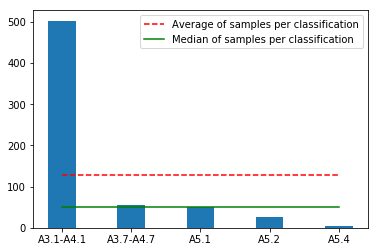

In [11]:
import matplotlib.pyplot as plt

plt.bar(sss_df.most_frequent.value_counts().index, sss_df.most_frequent.value_counts(), color='C0', width=.4)
plt.plot([np.mean(sss_df.most_frequent.value_counts())]*len(sss_df.most_frequent.value_counts()), color='red', linestyle = '--', label='Average of samples per classification')
plt.plot([np.median(sss_df.most_frequent.value_counts())]*len(sss_df.most_frequent.value_counts()), color='green', label='Median of samples per classification')
plt.legend()
plt.title('SideScan Sonar Distribution')
plt.savefig('sss_class_distr.jpg')
plt.show()


In [67]:
os.mkdir(os.path.join(new_folder,'labeled_sss'))

In [68]:
from shutil import copyfile
from re import search
def getImagesPath(parent_path, filenames):
    not_found = []
    for f in filenames:
        folder = f[:search('-\d',f).start()]
        filepath = os.path.join(parent_path, folder, f + '.png')
        dstpath = os.path.join(parent_path, 'labeled_sss', f + '.png')
        if os.path.exists(filepath):
            copyfile(filepath, dstpath)
        else:
            not_found.append(f)
    return not_found

In [69]:
not_found = getImagesPath(new_folder,sss_df.index)
sss_df = sss_df.drop(not_found)

In [70]:
len(pd.unique(sss_df.index))

639

In [71]:
def createHash(img, bot, top):
    hashmap = {}
    for i,j in it.product(range(img.shape[0]), range(img.shape[1])):
        if img[i,j] not in hashmap:
            if img[i,j] <= bot:
                hashmap[img[i,j]] = 0
            elif img[i,j] > top:
                hashmap[img[i,j]] = 255
            else:
                hashmap[img[i,j]] = 255 * ((img[i,j] - bot) / (top - bot))
                
    return hashmap

In [72]:
def linearStretch(img):
    bot = min(img.ravel())
    top = max(img.ravel())
        
    hashmap = createHash(img, bot, top)
    img2 = img
    for i, j in it.product(range(img2.shape[0]), range(img2.shape[1])):
        img2[i,j] = hashmap[img2[i,j]]
        
    return img2

def powerStretch(img):
    img2 = img
    #img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)  
    img2 = img2/255.0      
    im_power_law_transformation = cv2.pow(img2,0.65)
    im_power_law_transformation *= 255 
    im_power_law_transformation = im_power_law_transformation.astype('uint8')
    
    return im_power_law_transformation

def integratedColorModel(img):
    hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)   
    hue = hsvimg[:,:,0]
    saturation = hsvimg[:,:,1]
    value = hsvimg[:,:,2]
    valuecs = powerStretch(value)
    saturationcs = powerStretch(saturation)
    hlscs = cv2.merge((hue,saturationcs,valuecs))
    imc = cv2.cvtColor(hlscs, cv2.COLOR_HLS2RGB)
   
    return imc

def createImages(t):
    img = cv2.imread(os.path.join(cv_path,t))
    print('Processing', t)
    icm = integratedColorModel(img)
    cv2.imwrite(os.path.join(cv_path, icm_path,t), icm)

In [73]:
cv_path = os.path.join(new_folder,'labeled_sss')
icm_path = 'icm/'
if not os.path.exists(os.path.join(cv_path,icm_path)):
    os.mkdir(os.path.join(cv_path,icm_path))


In [ ]:
pool = mp.Pool(processes=mp.cpu_count())
pool.map(createImages, [f for f in os.listdir(cv_path) if os.path.isfile(os.path.join(cv_path, f))])

In [197]:
from sklearn.model_selection import train_test_split
from IPython.display import SVG,display
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

/home/diegues/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [198]:
def createDirectoryEnvironment(train_data, train_targets, val_data, val_targets, path):
    trainpath = path + 'train/'
    valpath = path + 'validation/'
    if(os.listdir() == 2):
        return trainpath,valpath
    if(not os.path.exists(trainpath)):
        os.mkdir(trainpath)
    if(not os.path.exists(valpath)):
        os.mkdir(valpath)
        
    classes = train_targets.columns.append(val_targets.columns).drop_duplicates()  
    for c in classes:
        train_class = trainpath + c + '/'
        val_class = valpath + c + '/'
        if(not os.path.exists(train_class)):
            os.mkdir(train_class)
        if(not os.path.exists(val_class)):
            os.mkdir(val_class)
            
    for f in train_data.index.values:
        copyfile(path + '../CV/' + f[:f.find('frame')-1] + '/icm/' + f, trainpath + train_targets.loc[f].idxmax(axis = 1) + '/' + f)
    for f in val_data.index.values:
        copyfile(path + '../CV/' + f[:f.find('frame')-1] + '/icm/' + f, valpath + val_targets.loc[f].idxmax(axis = 1) + '/' + f)
    
    return trainpath, valpath

In [8]:
from sklearn.model_selection import train_test_split

folder_path = new_folder
data = pd.read_csv(os.path.join(folder_path , "sss_class.csv"))

filenames = data['sss_name']
targets_ohe = data[['A3.1', 'A3.7', 'A4.1', 'A4.7', 'A5.1', 'A5.2', 'A5.4']]

X = data.groupby('sss_name').max()
Y = pd.concat([filenames,targets_ohe], axis = 1).groupby('sss_name').max()


# tts
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state=47)

#images_path = '/home/diegues/Desktop/ProcessedImages/SampledData/'
#train_dir, val_dir = createDirectoryEnvironment(train_X, train_Y, test_X, test_Y, images_path)

In [ ]:
vgg16_ft = VGG16(weights = '/home/diegues/git/AutomaticHabitatMapping/src/weights/eunis_photo_classifier.h5')
vgg16_ft.summary()